In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [110]:
df = pd.read_csv("../../data/guenther/guenther_complete.tsv", skiprows=76, delimiter="\t", na_values={'     ':np.nan})

In [111]:
df.columns

Index(['TIC', 'Sec', 'Outbst', 'Flare', 'tpeak', 'e_tpeak', 'E_tpeak', 'Amp',
       'e_Amp', 'E_Amp', 'FWHMdt', 'e_FWHMdt', 'E_FWHMdt', 'Ebol', 'e_Ebol',
       'E_Ebol', 'MCME', 'e_MCME', 'E_MCME', 'Teff', 'SpT', 'Prot-t', 'Prot-k',
       'Prot', 'aFFD', 'bFFD'],
      dtype='object')

In [112]:
df = df.replace('     ',9999)
df = df.replace('         ', np.nan)

In [154]:
fullconv = df[(df.SpT =="M4-M10") & (df.Amp >.2) & (df.Prot.astype(float)<.5)]

In [155]:
fullconv.Prot.unique()

array(['0.330389', '0.350149', '0.274577', '0.373484', '0.16519',
       '0.24192', '0.232933', '0.2658', '0.350296', '0.179332',
       '0.317704', '0.100378', '0.409895', '0.457255', '0.240481',
       '0.427334', '0.356666', '0.357278', '0.460872', '0.336186',
       '0.151577', '0.469225', '0.445607', '0.24919', '0.493011',
       '0.496034', '0.3697', '0.129207', '0.38061', '0.351883', '0.29475',
       '0.339576', '0.109599', '0.254214', '0.278915', '0.284583',
       '0.287775', '0.400483', '0.366655', '0.361917', '0.448385',
       '0.323365', '0.452847', '0.354722', '0.096678', '0.173634',
       '0.190722', '0.402336', '0.444417', '0.42935', '0.143229',
       '0.314956', '0.290342', '0.200665'], dtype=object)

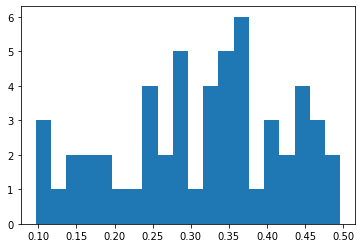

In [156]:
plt.hist(fullconv.Prot.astype(float).unique(), bins=20);
fracfast = fullconv[fullconv.Prot.astype(float)<.5].Prot.unique().shape[0] / fullconv.Prot.unique().shape[0]

In [157]:
fullconv[fullconv.FWHMdt > 0.02].shape[0] / fullconv.shape[0] 

0.0125

In [13]:
ns, bins = np.histogram(df.Flare.values, bins = np.arange(6))

In [14]:
ns = df.Flare.value_counts()

In [20]:
df

,TIC,Sec,Outbst,Flare,tpeak,e_tpeak,E_tpeak,Amp,e_Amp,E_Amp,Ebol,e_Ebol,E_Ebol
0,2760232,2,1,1,2.458357e+06,0.000863,0.000854,0.01475,0.00168,0.00170,,,NaN
1,2760232,2,2,1,2.458358e+06,0.001059,0.001026,0.01389,0.00162,0.00175,,,NaN
2,2760232,2,3,1,2.458360e+06,0.000026,0.000026,0.28258,0.00817,0.00949,,,NaN
3,2760232,2,3,2,2.458360e+06,0.000195,0.000195,0.04634,0.00589,0.00598,,,NaN
4,2760232,2,3,3,2.458360e+06,0.001735,0.001565,0.01665,0.00185,0.00155,,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8690,471015484,2,9,1,2.458371e+06,0.000070,0.000073,0.13585,0.00572,0.00568,,,NaN
8691,471015484,2,10,1,2.458373e+06,0.000201,0.000249,0.04478,0.00437,0.00442,,,NaN
8692,471015484,2,10,2,2.458373e+06,0.000323,0.000329,0.02797,0.00334,0.00339,,,NaN
8693,471015484,2,11,1,2.458379e+06,0.000151,0.000161,0.03871,0.00519,0.00646,,,NaN


In [47]:
# ns[1] - ns[2:].sum()
(ns[1] -  ns[2]) / ns[1] , (ns[1] - ns[3]) / ns[1]

(0.7649654360935432, 0.9591116340638329)

In [45]:
df[["Outbst", "TIC", "Sec"]].drop_duplicates().value_counts()

Outbst  TIC        Sec
58      140045538  1      1
3       100100909  2      1
        102032397  2      1
        102071750  2      1
        114819903  2      1
                         ..
7       273512747  1      1
        274017928  1      1
        277298771  1      1
                   2      1
1       2760232    2      1
Length: 6799, dtype: int64

In [19]:
largest = df.groupby(["Outbst", "TIC", "Sec"]).Amp.apply(lambda x: x.sort_values(ascending=False).iloc[0])

In [20]:
largest

Outbst  TIC        Sec
1       2760232    2      0.01475
        2761472    2      0.18707
        5640393    2      0.02089
        5656273    2      0.03756
        5676537    2      0.00681
                           ...   
54      140045538  1      0.02351
55      140045538  1      0.01189
56      140045538  1      0.00706
57      140045538  1      0.00994
58      140045538  1      0.05174
Name: Amp, Length: 6799, dtype: float64

In [22]:
count = df.groupby(["Outbst", "TIC", "Sec"]).Amp.count().rename("count")

In [9]:
largest

Outbst  TIC        Sec      
1       2760232    2    0       0.01475
        2761472    2    18      0.18707
        5640393    2    40      0.02089
        5656273    2    62      0.03756
        5676537    2    89      0.00681
                                 ...   
54      140045538  1    1880    0.02351
55      140045538  1    1881    0.01189
56      140045538  1    1882    0.00706
57      140045538  1    1883    0.00994
58      140045538  1    1884    0.05174
Name: Amp, Length: 6799, dtype: float64

In [25]:
vals = pd.DataFrame([largest, count]).T

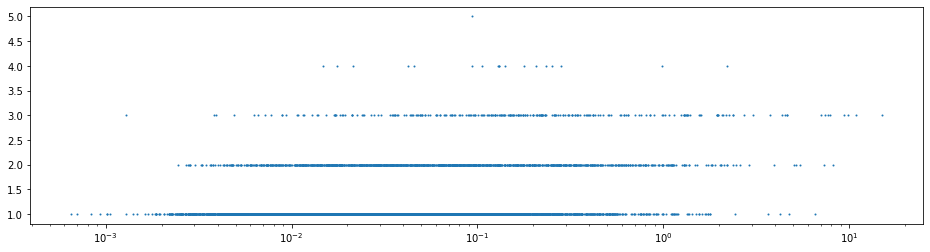

In [32]:
%matplotlib inline
plt.figure(figsize=(16,4))
plt.scatter(vals.Amp, vals["count"], s=1)
plt.xscale("log")

In [81]:
vals[vals["count"]>2].shape[0] /vals.shape[0]

0.040888365936167084

In [77]:
vals[vals["count"]>1].shape[0] /vals.shape[0]

0.23503456390645683

In [73]:
thrs = vals.Amp.quantile(.9)

In [74]:
thrs = .24

In [75]:
above = vals.loc[vals["Amp"]>thrs]
above["count"].mean(), above["count"].std(), above[above["count"]>1].shape[0] / above.shape[0]

(1.6808823529411765, 0.7339359370062297, 0.5264705882352941)

In [76]:
above = vals.loc[vals["Amp"]<thrs]
above["count"].mean(), above["count"].std(), above[above["count"]>1].shape[0] / above.shape[0]

(1.2341885929073377, 0.4980195735573598, 0.2026474914201667)

In [43]:
vals.loc[vals["Amp"]<thrs,"count"].mean(), vals.loc[vals["Amp"]<thrs,"count"].std()

(1.2638119478963916, 0.5256470146763119)

In [17]:
df.sort_values(by="Amp", ascending=False)

,TIC,Outbst,Flare,tpeak,e_tpeak,E_tpeak,Amp,e_Amp,E_Amp,Ebol,e_Ebol,E_Ebol
5605,260506296,3,2,2.458374e+06,0.000025,0.000028,15.05607,0.64057,0.90075,5.25E+034,5.22E+033,4.000000e+33
1009,52242947,2,2,2.458335e+06,0.000006,0.000006,10.87228,0.05092,0.05112,9.71E+033,8.42E+031,8.920000e+31
5606,260506296,3,3,2.458374e+06,0.000065,0.000064,9.96281,0.41320,0.38349,1.14E+035,6.21E+033,8.070000e+33
440,29430569,4,1,2.458330e+06,0.000005,0.000007,9.80526,0.78805,1.07629,7.14E+033,3.41E+032,3.230000e+32
1791,140045537,2,3,2.458329e+06,0.000049,0.000051,9.35656,0.32263,0.35452,,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4590,231061242,1,1,2.458369e+06,0.000669,0.000771,0.00102,0.00012,0.00012,1.13E+034,1.73E+033,1.940000e+33
4592,231061242,4,1,2.458373e+06,0.000375,0.000387,0.00093,0.00018,0.00021,4.4E+033,1.29E+033,1.420000e+33
4591,231061242,3,1,2.458372e+06,0.001915,0.002839,0.00084,0.00012,0.00014,2.83E+034,3.47E+033,3.170000e+33
4294,224244458,2,1,2.458357e+06,0.000308,0.000316,0.00070,0.00008,0.00009,6.54E+034,1.69E+034,2.250000e+34


In [23]:
dd = df.set_index(["Outbst", "TIC", "Sec"])

In [24]:
dd["nf"] = 

Flare         tpeak   e_tpeak   E_tpeak      Amp  \
Outbst TIC       Sec                                                     
1      2760232   2        1  2.458357e+06  0.000863  0.000854  0.01475   
2      2760232   2        1  2.458358e+06  0.001059  0.001026  0.01389   
3      2760232   2        1  2.458360e+06  0.000026  0.000026  0.28258   
                 2        2  2.458360e+06  0.000195  0.000195  0.04634   
                 2        3  2.458360e+06  0.001735  0.001565  0.01665   
...                     ...           ...       ...       ...      ...   
9      471015484 2        1  2.458371e+06  0.000070  0.000073  0.13585   
10     471015484 2        1  2.458373e+06  0.000201  0.000249  0.04478   
                 2        2  2.458373e+06  0.000323  0.000329  0.02797   
11     471015484 2        1  2.458379e+06  0.000151  0.000161  0.03871   
12     471015484 2        1  2.458380e+06  0.000078  0.000075  0.10938   

                        e_Amp    E_Amp       Ebol     e_Ebol  E_Ebol  
Outbst TIC       Sec                                                  
1      2760232   2    0.00168  0.00170                           NaN  
2      2760232   2    0.00162  0.00175                           NaN  
3      2760232   2    0.00817  0.00949                           NaN  
                 2    0.00589  0.00598                           NaN  
                 2    0.00185  0.00155                           NaN  
...                       ...      ...        ...        ...     ...  
9      471015484 2    0.00572  0.00568                           NaN  
10     471015484 2    0.00437  0.00442                           NaN  
                 2    0.00334  0.00339                           NaN  
11     471015484 2    0.00519  0.00646                           NaN  
12     471015484 2    0.00683  0.00801                           NaN  

[8695 rows x 10 columns]